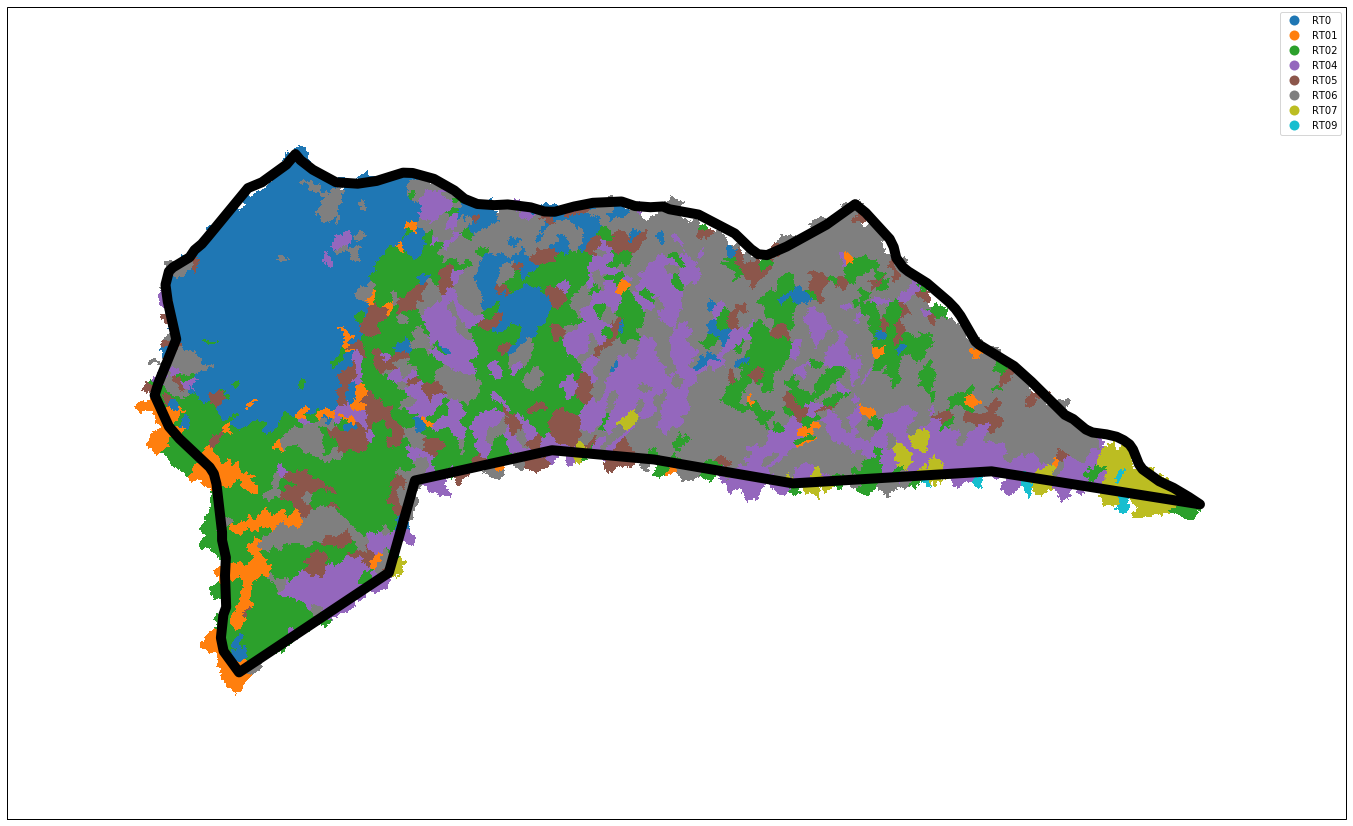

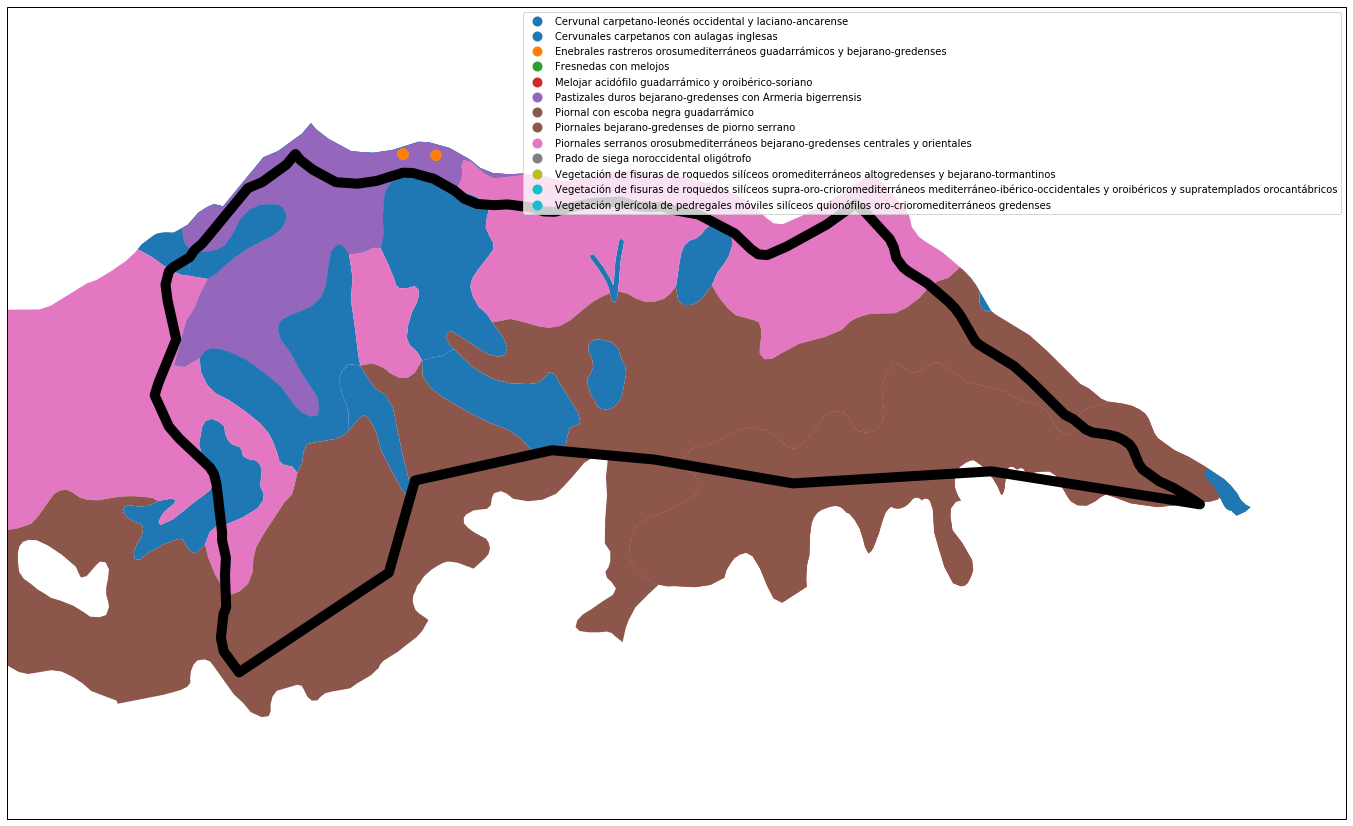

In [34]:
import psycopg2
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
from config import config

zona = 'tornavacas'

params = config()
conn = psycopg2.connect(**params)
proj = ccrs.TransverseMercator(central_longitude=-3.0,central_latitude=0.0,
                           false_easting=500000.0,false_northing=0.0,
                           scale_factor=0.9996)

# MODELOS DE COMBUSTIBLE

mod_comb = gpd.read_postgis('select a.* from mod_comb a, zona_estudio_{} b where st_intersects(a.geom, b.geom)'.format(zona), conn)

ze = gpd.read_postgis('select * from zona_estudio_{}'.format(zona), conn)
lim = ze.bounds.iloc[0]

fig = plt.figure(figsize=(24,18))
ax = plt.axes(projection=proj)

buffer = 1000
ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
ax.add_geometries(ze['geom'], crs=proj, facecolor=(0,0,0,0), edgecolor='black', linewidth=10)
mod_comb.plot(ax=ax, column='rt_0609', legend=True)
plt.show()
plt.close(fig)

# HABITATS

habitats = gpd.read_postgis('''select a.* 
                            from atlashabitats2005_extremadura a, 
                            zona_estudio_{} b 
                            where st_intersects(st_transform(a.geom, 25830), b.geom)'''.format(zona), conn)

fig = plt.figure(figsize=(24,18))
ax = plt.axes(projection=proj)

buffer = 1000
ax.set_extent([lim['minx'] - buffer, lim['maxx'] + buffer, lim['miny'] - buffer, lim['maxy'] + buffer], crs=proj)
ax.add_geometries(ze['geom'], crs=proj, facecolor=(0,0,0,0), edgecolor='black', linewidth=10)

habitats.plot(ax=ax, column='nom_comun', legend=True)
conn.close()